In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics as mts
from sklearn.cross_validation import train_test_split as tts
from sklearn.cross_validation import KFold, cross_val_score

In [17]:
# read dataset into pandas dataframe with name "initData"
mlDf = pd.read_csv('data/mldata_scikit.csv')

#  Train Test Split

In [18]:
X = mlDf.drop(['los','time_in_hospital'], axis=1)

In [19]:
y = mlDf.los

In [36]:
# sampling the data within X and y into four seperate sets
X_train, X_test, y_train, y_test = tts(X, y, random_state=40, train_size=0.7, test_size=0.3)

In [37]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

In [38]:
X_train.shape

(61821, 16)

In [39]:
X_test.shape

(26495, 16)

In [40]:
y_train.shape

(61821,)

In [41]:
y_test.shape

(26495,)

# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors=30)

In [86]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
knn_pred = knn.predict(X_test)

In [81]:
knn_score = mts.accuracy_score(y_test, knn_pred)
knn_score

0.85450084921683334

In [87]:
knn_cross_val_score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [88]:
knn_cross_val_score

array([ 0.85803238,  0.85803238,  0.86616848,  0.86039402,  0.85165893,
        0.86196354,  0.86015174,  0.86739894,  0.86524742,  0.86615332])

In [89]:
knn_cross_val_score.mean()

0.86152011446026133

In [72]:
#finding the right K for KNN
k_range = range(1, 31)
knn_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn , X, y, cv=10, scoring="accuracy")
    knn_scores.append(scores.mean())
print(knn_scores)

[0.80467850743842373, 0.84814760388202404, 0.83981380509013159, 0.85408084801541051, 0.85027633476503583, 0.85675312640402146, 0.85447718680579343, 0.85836102524801972, 0.85704752841031939, 0.85899503194121074, 0.85833829313932952, 0.85962912453575124, 0.85974239276081621, 0.8609539579321982, 0.86061428529634676, 0.86089734689519448, 0.86036513211647581, 0.8608747019670776, 0.86063685073955509, 0.86114645263897793, 0.86116906038686258, 0.86122572270749598, 0.86135025442487245, 0.86118042259656846, 0.86120304701123351, 0.86138422438333395, 0.86159934478516398, 0.86149746696934193, 0.86144084951821931, 0.86152011446026133]


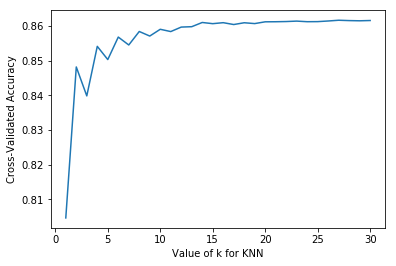

In [90]:
kofknn = plt.plot(k_range, knn_scores)
kofknn = plt.xlabel('Value of k for KNN')
kofknn = plt.ylabel('Cross-Validated Accuracy')

# SVM

In [127]:
from sklearn import svm
from sklearn.svm import SVC

In [43]:
svm = svm.SVC(kernel='linear', C=0.01)
svm

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
svm.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
# evaluating the data using the predict() command and the test data
svm_pred = svm.predict(X_test)

In [46]:
svm_score = mts.accuracy_score(y_test, svm_pred)
svm_score

0.85038686544631059

In [118]:
svm_cross_val_score = cross_val_score(svm, X, y, cv=10, scoring='accuracy')

In [119]:
svm_cross_val_score

array([ 0.84806974,  0.84806974,  0.84816576,  0.84816576,  0.84814857,
        0.84814857,  0.84814857,  0.84814857,  0.84814857,  0.84814857])

In [120]:
svm_cross_val_score.mean()

0.84813624039773905

In [131]:
#finding the right C for SVM
c_range = [0.001, 0.01, 0.1, 1]
svm_scores = []
for c in c_range:
    svm = SVC(kernel='linear', C=0.01)
    scores = cross_val_score(svm, X, y, cv=10, scoring="accuracy")
    svm_scores.append(scores.mean())
print(svm_scores)

[0.84813624039773905, 0.84813624039773905, 0.84813624039773905, 0.84813624039773905]


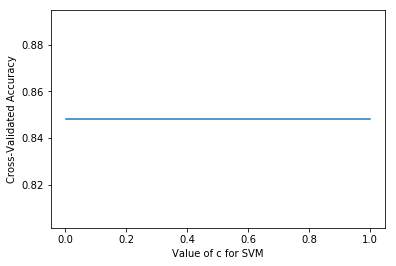

In [132]:
plt.plot(c_range, svm_scores)
plt.xlabel('Value of c for SVM')
plt.ylabel('Cross-Validated Accuracy')

# Decision Trees

In [129]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [130]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [50]:
# evaluating the data using the predict() command and the test data
tree_pred = tree.predict(X_test)
tree_score = mts.accuracy_score(y_test, tree_pred)
tree_score

0.79403661068126064

In [115]:
tree_cross_val_score = cross_val_score(tree, X, y, cv=10, scoring='accuracy')

In [116]:
tree_cross_val_score

array([ 0.79350164,  0.7893128 ,  0.76902174,  0.79019475,  0.78213113,
        0.78790624,  0.77601631,  0.79334164,  0.78247084,  0.78462235])

In [117]:
tree_cross_val_score.mean()

0.78485194377333067

In [ ]:
#finding the right min_sample_split for Decision Trees model
samples_range = [2,4,6,8,10,12,14,16,18,20]
tree_scores = []
for s in samples_range:
    tree = DecisionTreeClassifier(min_samples_split = s)
    scores = cross_val_score(tree, X, y, cv=10, scoring="accuracy")
    tree_scores.append(scores.mean())
print(tree_scores)

In [ ]:
plt.plot(samples_range, tree_scores)
plt.xlabel('Value of minimum Sample Split for Decision Trees')
plt.ylabel('Cross-Validated Accuracy')

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [103]:
logreg = LogisticRegression()

In [104]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
logreg_predict = logreg.predict(X_test)

In [107]:
logreg_score = mts.accuracy_score(y_test, logreg_predict)

In [108]:
logreg_score

0.86420079260237781

In [112]:
logreg_cross_val_score = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

In [113]:
logreg_cross_val_score

array([ 0.85384354,  0.85497566,  0.86458333,  0.85677083,  0.85120598,
        0.85879289,  0.85969879,  0.86536066,  0.86558714,  0.86490771])

In [114]:
logreg_cross_val_score.mean()

0.85957265323781995

In [109]:
#finding the right C for Logistic Regression
c_range = [0.001, 0.01, 0.1, 1]
lr_scores = []
for c in c_range:
    logreg = LogisticRegression(penalty='l2', C = c)
    scores = cross_val_score(logreg, X, y, cv=10, scoring="accuracy")
    lr_scores.append(scores.mean())
print(lr_scores)

[0.85498674640286276, 0.85807797775431105, 0.85947074721752581, 0.85957265323781995]


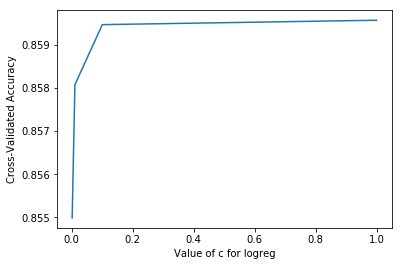

In [110]:
plt.plot(c_range, lr_scores)
plt.xlabel('Value of c for logreg')
plt.ylabel('Cross-Validated Accuracy')